In [57]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep

In [58]:
class Particle:
    
    def __init__(self,r0,v0,a0,f0,t,m=1,radius=2,Id=0):
        
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        self.f = f0
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        self.F = np.zeros_like(self.R)
        
        self.radius = radius
        self.m = m
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetAcceleration(i)
        self.SetForce(i)
        
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        self.a = 0
        self.f = 0
        
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def SetAcceleration(self,i):
        self.A[i] = self.a
        
    def GetAcceleration(self,scale=1):
        return self.A[::scale]
    
    def SetForce(self,i):
        self.F[i] = self.f
        
    def GetForce(self,scale=1):
        return self.F[::scale]

    def CheckLimits(self,Limits):
        
        for i in range(2):
        
            if self.r[i] + self.radius > Limits[i][1] and self.v[i] > 0.:
                self.v[i] = -1.0*self.v[i]
            if self.r[i] - self.radius < Limits[i][0] and self.v[i] < 0.:
                self.v[i] = -1.0*self.v[i]
                
    def CheckCollision(self, particle, k=100.):
        n = self.r - particle.r
        norm = np.linalg.norm(n)
        if norm < self.radius + particle.radius:
            self.f = k*(np.power(norm,3))*(n/norm)
            self.a = self.f/self.m

In [59]:
def RunSimulation1(t,Wall):
    
    r0_1 = np.array([-15.,1.])
    v0_1 = np.array([10.,0.])
    a0_1 = np.array([0.,0.])
    f0_1 = np.array([0., 0.])
    
    r0_2 = np.array([0.,-1.5])
    v0_2 = np.array([0.,0.])
    a0_2 = np.array([0.,0.])
    f0_2 = np.array([0., 0.])
    
    
    p1 = Particle(r0_1,v0_1,a0_1,f0_1,t, Id = 1)
    p2 = Particle(r0_2,v0_2,a0_2,f0_2,t, Id = 2)
    
    Wall_ = Wall.copy()
    
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        sleep(0.0001)
        p1.Evolution(it)
        p2.Evolution(it)
        p1.CheckLimits(Wall_)
        p2.CheckLimits(Wall_)
        p1.CheckCollision(p2)
        p2.CheckCollision(p1)
    
    return [p1,p2]

In [60]:
# Region
Limits = np.array([[-30.,30.],[-30.,30.]])

In [61]:
dt = 0.05
tmax = 10
t = np.arange(0.,tmax,dt)
Particles = RunSimulation1(t,Limits)

Running simulation: 100%|██████████| 200/200 [00:03<00:00, 65.04 Steps/s]


In [62]:
scale = 1

In [63]:
t = t[::scale]

In [64]:
#Particles.GetPosition(3)

<IPython.core.display.Javascript object>


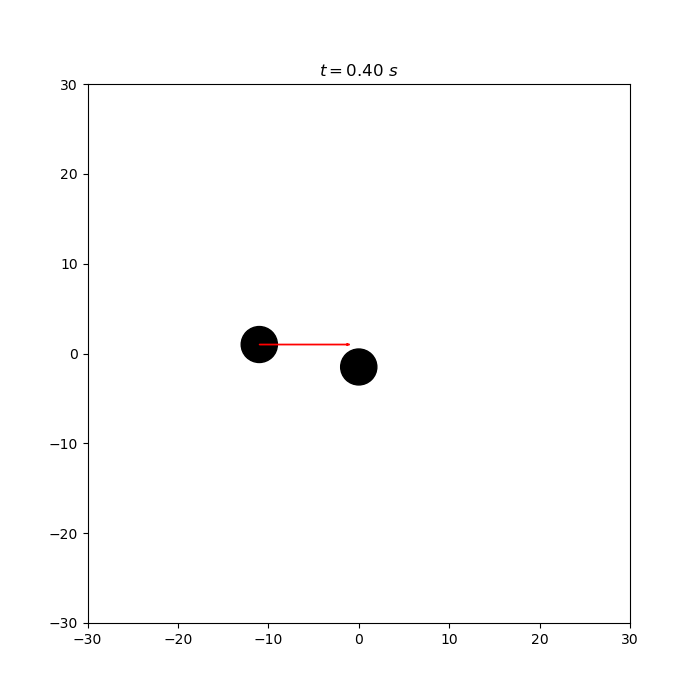

In [65]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])
    
def Update(i):
    
    ax.clear()
    init()
    ax.set_title(r'$ t=%.2f \ s$' %(t[i]))
    
    
    x1 = Particles[0].GetPosition(scale)[i,0]
    y1 = Particles[0].GetPosition(scale)[i,1]
    vx1 = Particles[0].GetVelocity(scale)[i,0]
    vy1 = Particles[0].GetVelocity(scale)[i,1]
    
    x2 = Particles[1].GetPosition(scale)[i,0]
    y2 = Particles[1].GetPosition(scale)[i,1]
    vx2 = Particles[1].GetVelocity(scale)[i,0]
    vy2 = Particles[1].GetVelocity(scale)[i,1]
    
    circle1 = plt.Circle((x1,y1),Particles[0].radius, fill=True, color='k')
    circle2 = plt.Circle((x2,y2),Particles[1].radius, fill=True, color='k')
    
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    
    ax.arrow(x1,y1,vx1,vy1,color='r',head_width=0.2,length_includes_head=True)
    ax.arrow(x2,y2,vx2,vy2,color='r',head_width=0.2,length_includes_head=True)
    
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)

In [10]:
Writer = anim.writers['ffmpeg']
fps = (1./dt) / scale
writer_ = Writer(fps=fps, metadata=dict(artist='Me'))
#Animation.save('Particula.mp4', writer=writer_)

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [ ]:
#del Particles